In [1]:
from lib.notebook_imports import *

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

%load_ext autoreload
%autoreload 2

shap.initjs()

start_time = datetime.now()


# READ DATA

In [2]:
data_900 = read_data('/dysk1/approx/invicta/1.1.1./', merge_with_meds=True, merge_with_patient_genes=True)
data_900_df = data_900.input_df
data_2015_df = read_data_2015('/dysk1/approx/invicta/1.1.1./')

LGB_PARAMS_BASE, N_FOLDS, ALL_MODEL_SUFFIXES, BASE_COLS_1, BASE_COLS_2 = get_consts()

DATA_SERIES_900, DATA_SERIES_2015, DATA_SERIES = prepare_data_series(data_900_df, data_2015_df, N_FOLDS)


Converting ds_789_result_num_E2 to float
Converting amh_qual_result_num to float
Converting qual_result_num_FSH to float
Converting qual_result_num_DHEAS to float
Converting qual_result_num_Inh_B to float
Converting qual_result_num_TST to float
Converting qual_result_num_anty_TPO to float
Converting qual_result_num_TSH to float
Converting qual_result_num_SHBG to float
weight    0.503356
height    0.492170
bmi       0.460850
dtype: float64
pickups_df:                  981
merged with meds_df:         936
merged with patient_gens_df: 922
merged with poli_changes_df: 922
merged with causes_df: 922
merged with patient_groups_df: 922
merged with body_df: 922
-
dhea_s:          low: 2%,  normal: 87%, high: 11%, filled: 63%, ()
shbg:            low: 1%,  normal: 80%, high: 19%, filled: 39%, ()
testosterone:    low: 49%, normal: 46%, high: 5%, filled: 40%, ()
fsh:             low: 9%,  normal: 64%, high: 26%, filled: 45%, (?)
tsh:             low: 65%, normal: 32%, high: 3%, filled: 72%, ()
lh

Columns (22,34,43,47,51,57,62,82,238,240) have mixed types.Specify dtype option on import or set low_memory=False.


Data len: 13084
Data len: 13084 after merge with causes
Converting amh_qual_result_num to float
Converting qual_result_num_FSH to float
Converting qual_result_num_DHEAS to float
Converting qual_result_num_Inh_B to float
Converting qual_result_num_TST to float
Converting qual_result_num_anty_TPO to float
Converting qual_result_num_TSH to float
Converting qual_result_num_SHBG to float
Converting ds1_3_dawka to float
Converting ds1_7_dawka to float
-
FSH:             low: 8%,  normal: 76%, high: 16%, filled: 42%, (?)
DHEAS:           low: 3%,  normal: 86%, high: 10%, filled: 60%, ()
Inh_B:           low: 30%, normal: 40%, high: 29%, filled: 45%, (faza folikularna)
TST:             low: 54%, normal: 44%, high: 2%, filled: 45%, ()
TSH:             low: 62%, normal: 35%, high: 3%, filled: 55%, ()
SHBG:            low: 1%,  normal: 75%, high: 24%, filled: 42%, ()
-
valid_FSH:       low: 9%,  normal: 74%, high: 17%, filled: 28%, (?)
valid_DHEAS:     low: 3%,  normal: 86%, high: 10%, filled: 46

# PROTOCOL SETS

In [3]:
PROT_SETS = prepare_protocol_sets(data_2015_df)

# BASE MODEL

In [4]:
cols = BASE_COLS_2

In [5]:
BASE_MODEL = train_data_series(
    LGB_PARAMS_BASE,
    DATA_SERIES,
    cols,
    model_suffixes_filter=ALL_MODEL_SUFFIXES)

invalid value encountered in log
invalid value encountered in log
invalid value encountered in log
invalid value encountered in log
invalid value encountered in log
invalid value encountered in log
invalid value encountered in log
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
invalid value encountered in log
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
invalid value encountered in log
invalid value encountered in log
invalid value encountered in log
invalid value encountered in log
invalid value encountered in log
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
invalid value encountered in log
divide by zero encountered in double_scalars
divide by zero encountered in double_scalar

# KRR

In [6]:
merged_test_df_900 = BASE_MODEL.get_merged_test_dfs_from_folds('900_day_0_mii')
merged_test_df_2015 = BASE_MODEL.get_merged_test_dfs_from_folds('2015_day_0_mii')

In [7]:
THERAPY_PREDICTOR_CLASS_NAMES = get_therapy_predictor_class_names()
THERAPY_PREDICTOR_FACTORY = TherapyPredictorFactory(
    LGB_PARAMS_BASE,
)


# DATA_2015 - MII

In [27]:
MERGED_TEST_DF = merged_test_df_2015
PLOT_DOTS = False
X_COL = 'prediction_l2'
Y_COL = 'day_0_mii'
PROT_SET = PROT_SETS.PROT_TYPE
KDE_THRESHOLD = 0.025

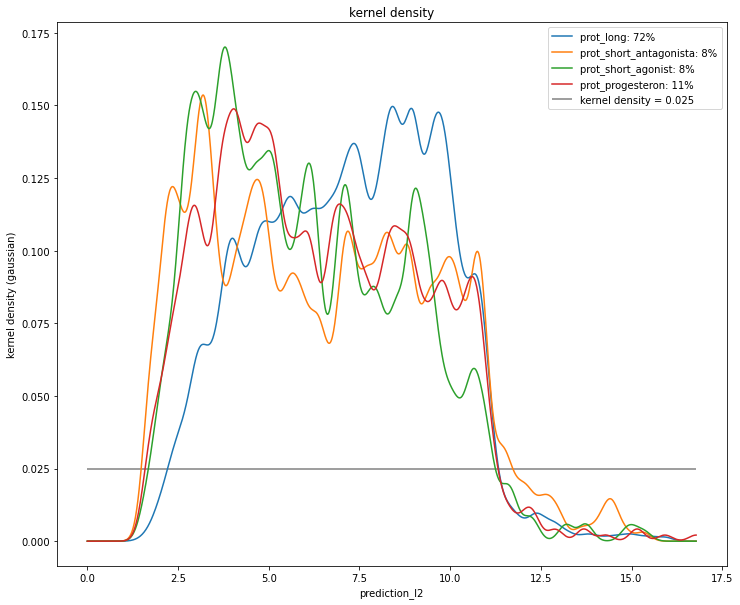

CPU times: user 686 ms, sys: 301 ms, total: 988 ms
Wall time: 1.07 s


In [28]:
%%time

plot_kde_density_for_protocols(
    X_COL,
    MERGED_TEST_DF,
    PROT_SET,
    KDE_THRESHOLD,
)

Fitting KernelRidgePredictor: 6245: 0:04:03.056606
Fitting KernelRidgePredictor: 673: 0:00:06.530278
Fitting KernelRidgePredictor: 684: 0:00:05.953108
Fitting KernelRidgePredictor: 950: 0:00:10.056003


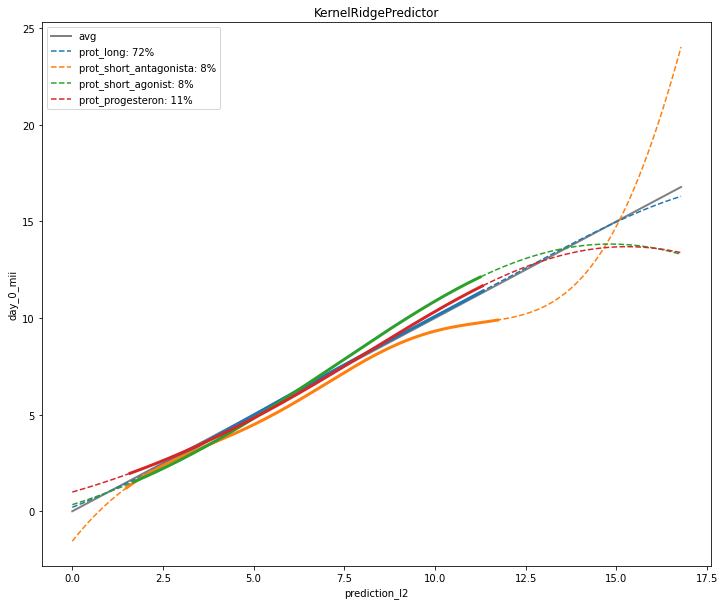

Fitting KernelRidgePredictor: 6245: 0:04:37.488046
Fitting KernelRidgePredictor: 673: 0:00:11.529987
Fitting KernelRidgePredictor: 684: 0:00:16.759334
Fitting KernelRidgePredictor: 950: 0:00:08.294298


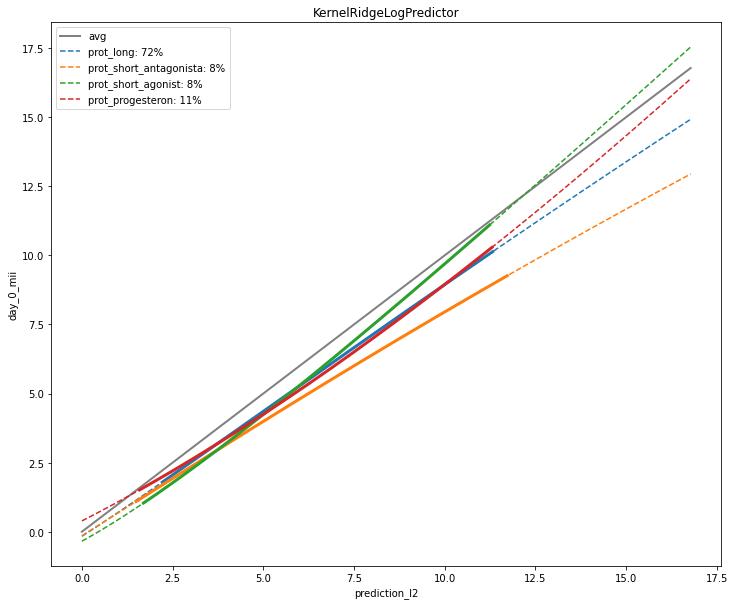

Fitting GausianProcessRegressorPredictor: 6245: 0:44:08.831108
Fitting GausianProcessRegressorPredictor: 673: 0:00:23.276558
Fitting GausianProcessRegressorPredictor: 684: 0:00:19.682181
Fitting GausianProcessRegressorPredictor: 950: 0:00:53.049065


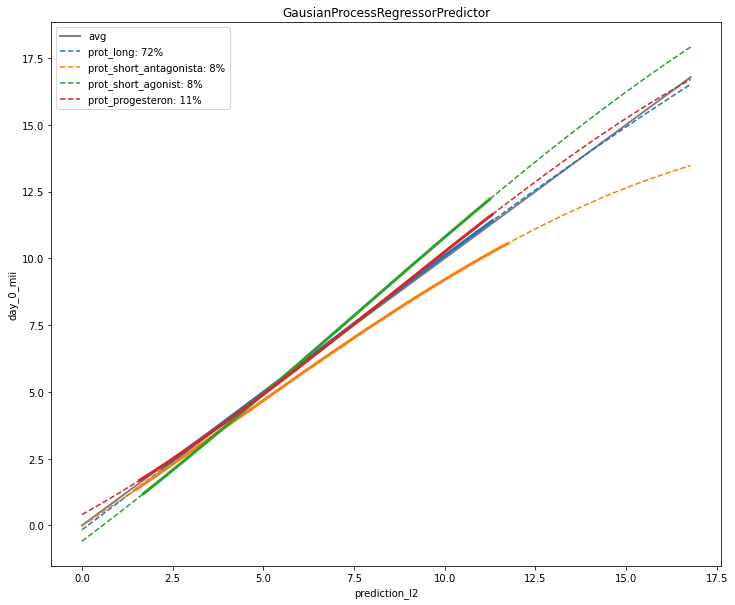

Fitting GausianProcessRegressorPredictor: 6245: 0:30:06.107890
Fitting GausianProcessRegressorPredictor: 673: 0:00:15.280027
Fitting GausianProcessRegressorPredictor: 684: 0:00:16.415452
Fitting GausianProcessRegressorPredictor: 950: 0:00:30.834132


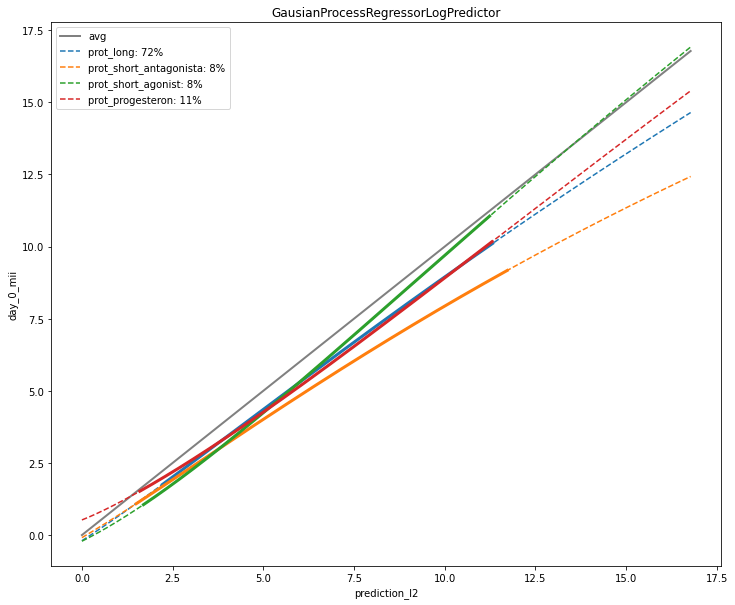

Fitting LGBMPredictor: 6245: 0:00:00.032356
Fitting LGBMPredictor: 673: 0:00:00.022314
Fitting LGBMPredictor: 684: 0:00:00.022550
Fitting LGBMPredictor: 950: 0:00:00.022728


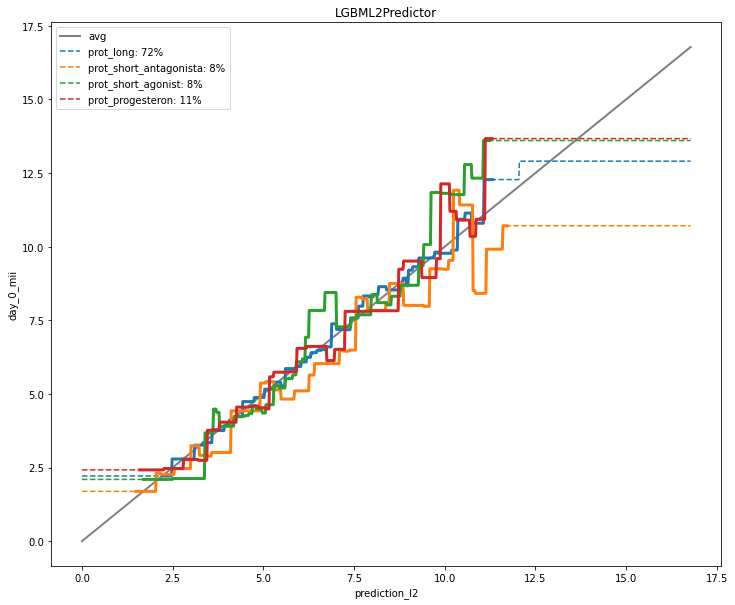

Fitting LGBMPredictor: 6245: 0:00:00.033627
Fitting LGBMPredictor: 673: 0:00:00.023432
Fitting LGBMPredictor: 684: 0:00:00.023558
Fitting LGBMPredictor: 950: 0:00:00.023696


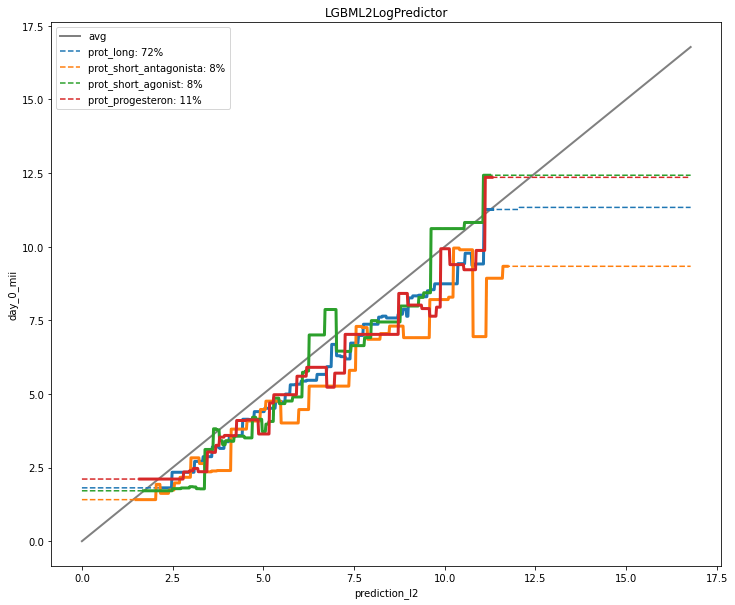

Fitting LGBMPredictor: 6245: 0:00:00.036250
Fitting LGBMPredictor: 673: 0:00:00.027180
Fitting LGBMPredictor: 684: 0:00:00.027001
Fitting LGBMPredictor: 950: 0:00:00.027219


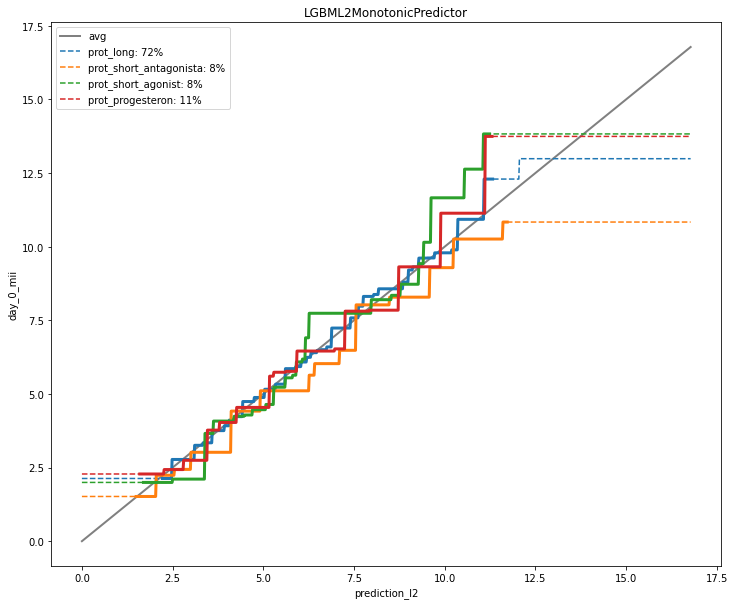

Fitting LGBMPredictor: 6245: 0:00:00.037528
Fitting LGBMPredictor: 673: 0:00:00.028056
Fitting LGBMPredictor: 684: 0:00:00.031802
Fitting LGBMPredictor: 950: 0:00:00.030078


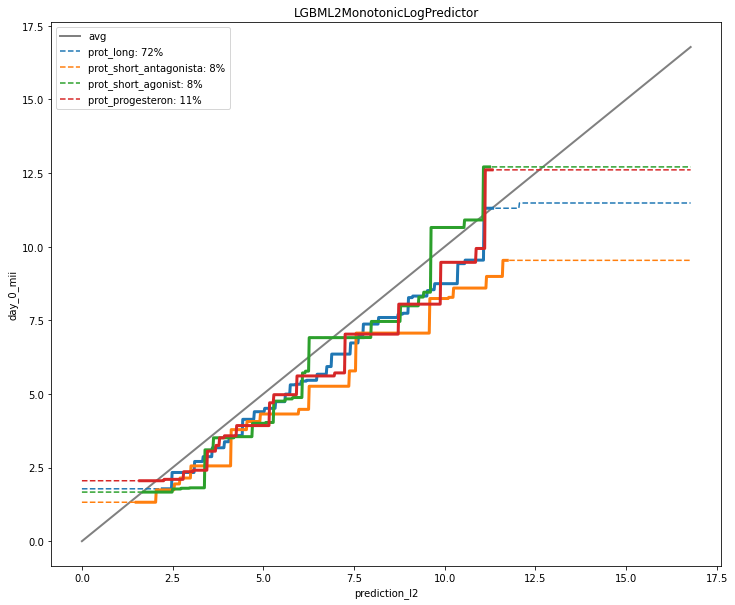

Fitting LGBMPredictor: 6245: 0:00:00.040926
Fitting LGBMPredictor: 673: 0:00:00.023977
Fitting LGBMPredictor: 684: 0:00:00.024213
Fitting LGBMPredictor: 950: 0:00:00.024780


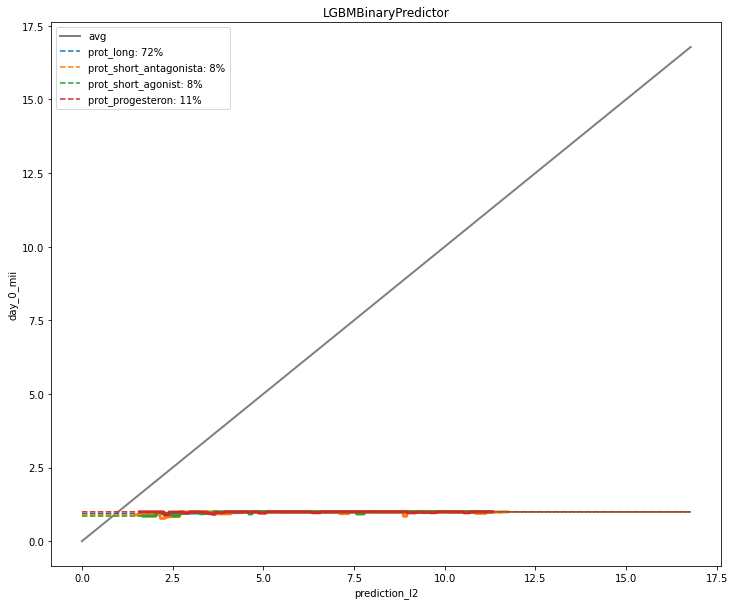

Fitting LGBMPredictor: 6245: 0:00:00.043909
Fitting LGBMPredictor: 673: 0:00:00.025650
Fitting LGBMPredictor: 684: 0:00:00.025699
Fitting LGBMPredictor: 950: 0:00:00.026579


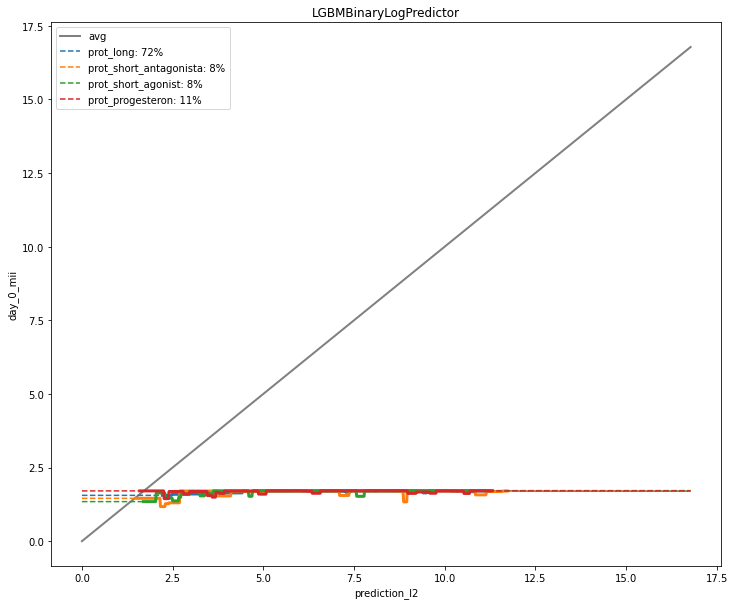

Fitting LGBMPredictor: 6245: 0:00:00.048398
Fitting LGBMPredictor: 673: 0:00:00.026272
Fitting LGBMPredictor: 684: 0:00:00.028709
Fitting LGBMPredictor: 950: 0:00:00.027099


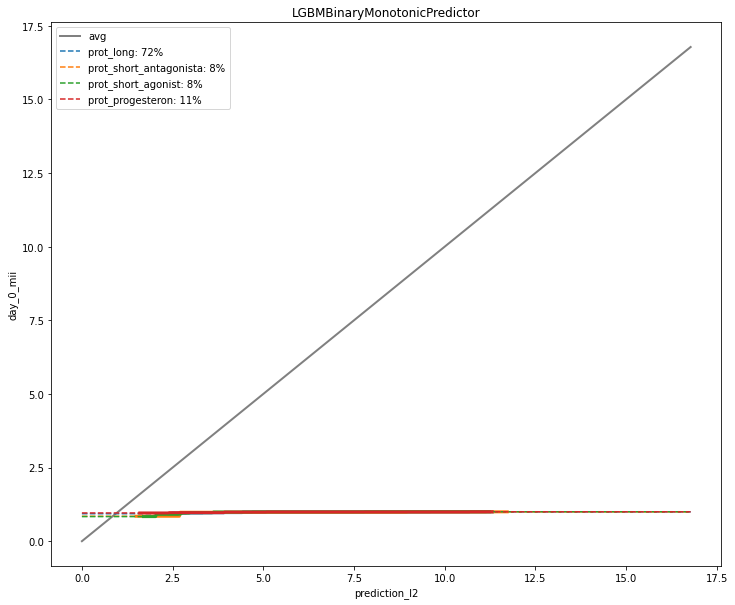

Fitting LGBMPredictor: 6245: 0:00:00.049573
Fitting LGBMPredictor: 673: 0:00:00.027469
Fitting LGBMPredictor: 684: 0:00:00.030036
Fitting LGBMPredictor: 950: 0:00:00.028075


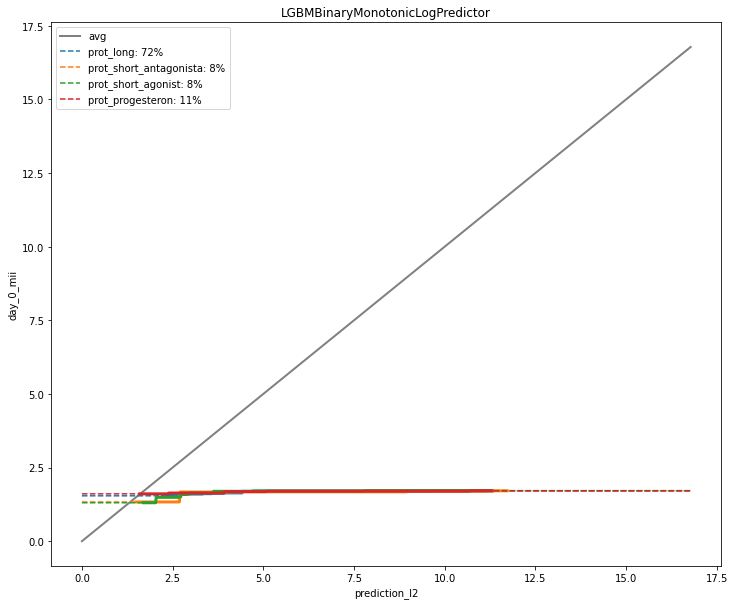

CPU times: user 12h 20min 27s, sys: 3h 58min 9s, total: 16h 18min 36s
Wall time: 1h 26min 46s


In [29]:
%%time

for therapy_predictor_class_name in THERAPY_PREDICTOR_CLASS_NAMES:
    
    plot_protocols(
        X_COL,
        Y_COL,
        THERAPY_PREDICTOR_FACTORY,
        therapy_predictor_class_name,
        MERGED_TEST_DF,
        PROT_SET,
        PLOT_DOTS,
        KDE_THRESHOLD,
    )


In [11]:
%%time

calculate_rmse_for_protocols(
    X_COL,
    Y_COL,
    THERAPY_PREDICTOR_FACTORY,
    THERAPY_PREDICTOR_CLASS_NAMES,
    MERGED_TEST_DF,
    PROT_SET,
    n_folds=5,
    error_metric='RMSE',
)


Fitting KernelRidgePredictor: 4990: 0:02:05.687606
Fitting KernelRidgePredictor: 516: 0:00:02.893508
Fitting KernelRidgePredictor: 547: 0:00:03.155899
Fitting KernelRidgePredictor: 786: 0:00:05.591665
Fitting KernelRidgePredictor: 5012: 0:02:06.870886
Fitting KernelRidgePredictor: 534: 0:00:02.981172
Fitting KernelRidgePredictor: 549: 0:00:03.308901
Fitting KernelRidgePredictor: 752: 0:00:05.156778
Fitting KernelRidgePredictor: 4995: 0:02:16.787524
Fitting KernelRidgePredictor: 543: 0:00:03.209186
Fitting KernelRidgePredictor: 555: 0:00:03.144394
Fitting KernelRidgePredictor: 744: 0:00:04.895167
Fitting KernelRidgePredictor: 4977: 0:02:21.994904
Fitting KernelRidgePredictor: 553: 0:00:03.115977
Fitting KernelRidgePredictor: 555: 0:00:03.283951
Fitting KernelRidgePredictor: 758: 0:00:05.325083
Fitting KernelRidgePredictor: 5006: 0:02:07.803364
Fitting KernelRidgePredictor: 546: 0:00:03.031323
Fitting KernelRidgePredictor: 530: 0:00:03.175054
Fitting KernelRidgePredictor: 760: 0:00:05.56

Fitting LGBMPredictor: 534: 0:00:00.221104
Fitting LGBMPredictor: 549: 0:00:00.024521
Fitting LGBMPredictor: 752: 0:00:00.026168
Fitting LGBMPredictor: 4995: 0:00:00.041177
Fitting LGBMPredictor: 543: 0:00:00.024577
Fitting LGBMPredictor: 555: 0:00:00.024547
Fitting LGBMPredictor: 744: 0:00:00.025850
Fitting LGBMPredictor: 4977: 0:00:00.182320
Fitting LGBMPredictor: 553: 0:00:00.208909
Fitting LGBMPredictor: 555: 0:00:00.024526
Fitting LGBMPredictor: 758: 0:00:00.025491
Fitting LGBMPredictor: 5006: 0:00:00.041003
Fitting LGBMPredictor: 546: 0:00:00.024777
Fitting LGBMPredictor: 530: 0:00:00.021000
Fitting LGBMPredictor: 760: 0:00:00.022100
Fitting LGBMPredictor: 4990: 0:00:00.033642
Fitting LGBMPredictor: 516: 0:00:00.021086
Fitting LGBMPredictor: 547: 0:00:00.021440
Fitting LGBMPredictor: 786: 0:00:00.022664
Fitting LGBMPredictor: 5012: 0:00:00.048037
Fitting LGBMPredictor: 534: 0:00:00.248763
Fitting LGBMPredictor: 549: 0:00:00.025077
Fitting LGBMPredictor: 752: 0:00:00.026494
Fittin

,['prot_long'],['prot_short_antagonista'],['prot_short_agonist'],['prot_progesteron'],all_protocols
KernelRidgePredictor : fold_0,3.87,3.75,4.08,3.63,3.85
KernelRidgePredictor : fold_1,3.81,3.65,3.45,3.73,3.76
KernelRidgePredictor : fold_2,3.96,3.92,3.06,3.65,3.86
KernelRidgePredictor : fold_3,3.77,3.30,3.64,3.63,3.71
KernelRidgePredictor : fold_4,3.79,4.05,3.97,3.78,3.83
KernelRidgeLogPredictor : fold_0,4.00,3.77,4.19,3.77,3.97
KernelRidgeLogPredictor : fold_1,3.89,3.66,3.42,3.84,3.83
KernelRidgeLogPredictor : fold_2,4.03,3.97,2.84,3.85,3.92
KernelRidgeLogPredictor : fold_3,3.90,3.53,3.74,3.62,3.84
KernelRidgeLogPredictor : fold_4,3.86,4.11,4.11,3.83,3.90


,['prot_long'],['prot_short_antagonista'],['prot_short_agonist'],['prot_progesteron'],all_protocols
KernelRidgePredictor : all_folds,3.84,3.75,3.67,3.68,3.80
KernelRidgeLogPredictor : all_folds,3.94,3.82,3.71,3.78,3.89
GausianProcessRegressorPredictor : all_folds,3.83,3.70,3.63,3.68,3.79
GausianProcessRegressorLogPredictor : all_folds,3.94,3.82,3.71,3.78,3.89
LGBML2Predictor : all_folds,3.86,3.80,3.66,3.73,3.82
LGBML2LogPredictor : all_folds,3.96,3.89,3.76,3.83,3.92
LGBML2MonotonicPredictor : all_folds,3.85,3.76,3.65,3.71,3.81
LGBML2MonotonicLogPredictor : all_folds,3.96,3.86,3.73,3.81,3.92
LGBMBinaryPredictor : all_folds,7.76,6.84,7.09,7.16,7.58
LGBMBinaryLogPredictor : all_folds,7.21,6.35,6.59,6.64,7.03


CPU times: user 1d 14h 32min 34s, sys: 15h 30min 26s, total: 2d 6h 3min
Wall time: 6h 6min 58s


# DATA_2015 - HIPER 20

In [12]:
MERGED_TEST_DF = merged_test_df_2015
PLOT_DOTS = False
X_COL = 'prediction_h20'
Y_COL = 'hiper_20'
PROT_SET = PROT_SETS.PROT_TYPE
KDE_THRESHOLD = 0.25


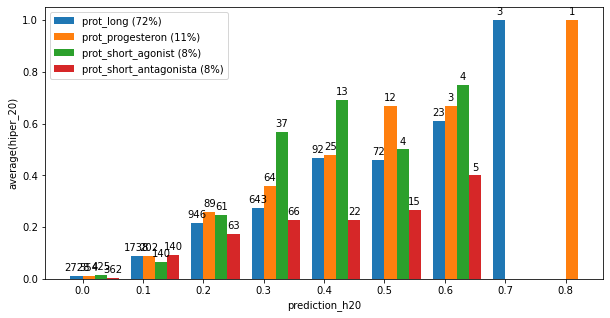

In [22]:
plot_results_with_segments_and_groups(
    MERGED_TEST_DF,
    target_col='hiper_20',
    segmentation_col='prot_type', top_segments=4, segments=None,
    groupby_col='prediction_h20', groupby_round=1, groupby_min=0, groupby_max=1,
    groupby_dict=None,
    title='')

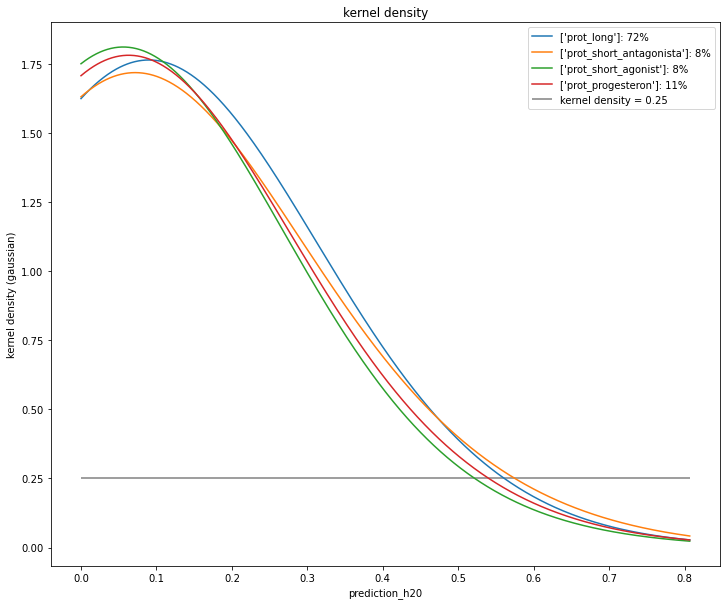

CPU times: user 1.19 s, sys: 0 ns, total: 1.19 s
Wall time: 1.18 s


In [13]:
%%time

plot_kde_density_for_protocols(
    X_COL,
    MERGED_TEST_DF,
    PROT_SET,
    KDE_THRESHOLD,
)

Fitting KernelRidgePredictor: 6245: 0:03:08.488350
Fitting KernelRidgePredictor: 673: 0:00:04.260613
Fitting KernelRidgePredictor: 684: 0:00:04.144080
Fitting KernelRidgePredictor: 950: 0:00:06.878409


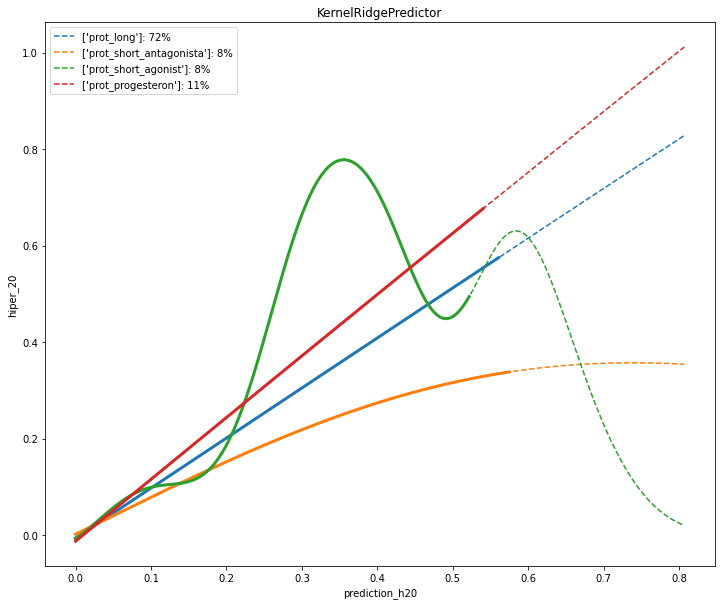

Fitting KernelRidgePredictor: 6245: 0:03:16.352298
Fitting KernelRidgePredictor: 673: 0:00:04.561877
Fitting KernelRidgePredictor: 684: 0:00:04.645365
Fitting KernelRidgePredictor: 950: 0:00:07.216705


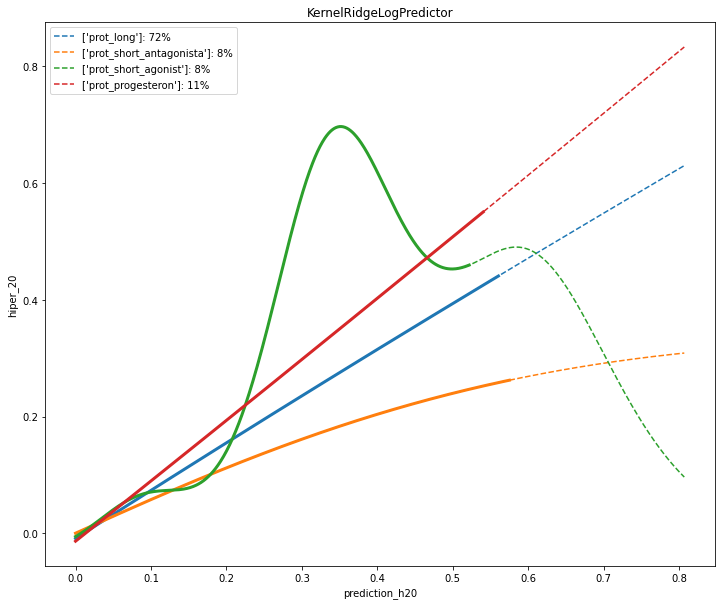

Fitting GausianProcessRegressorPredictor: 6245: 0:42:52.268736
Fitting GausianProcessRegressorPredictor: 673: 0:00:28.650465
Fitting GausianProcessRegressorPredictor: 684: 0:00:29.187517
Fitting GausianProcessRegressorPredictor: 950: 0:00:43.610255


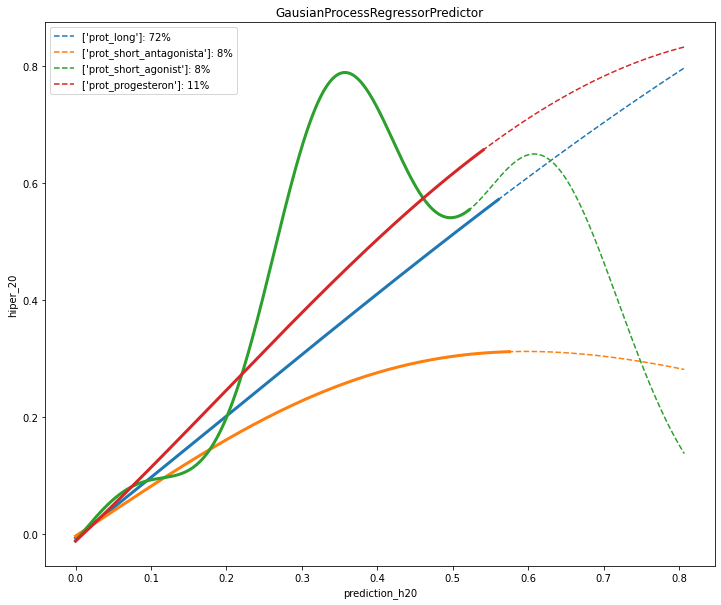

Fitting GausianProcessRegressorPredictor: 6245: 0:43:43.453678
Fitting GausianProcessRegressorPredictor: 673: 0:00:21.355729
Fitting GausianProcessRegressorPredictor: 684: 0:00:21.277952
Fitting GausianProcessRegressorPredictor: 950: 0:00:48.022187


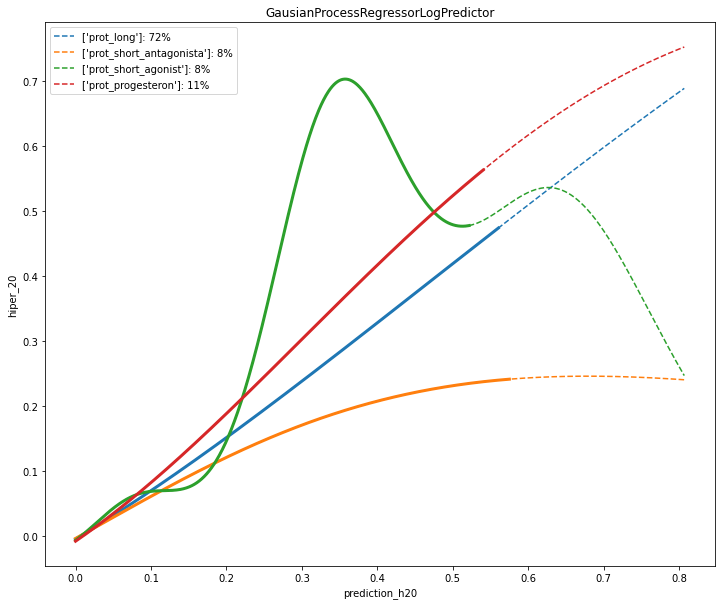

Fitting LGBMPredictor: 6245: 0:00:00.027050
Fitting LGBMPredictor: 673: 0:00:00.297768
Fitting LGBMPredictor: 684: 0:00:00.019200
Fitting LGBMPredictor: 950: 0:00:00.019904


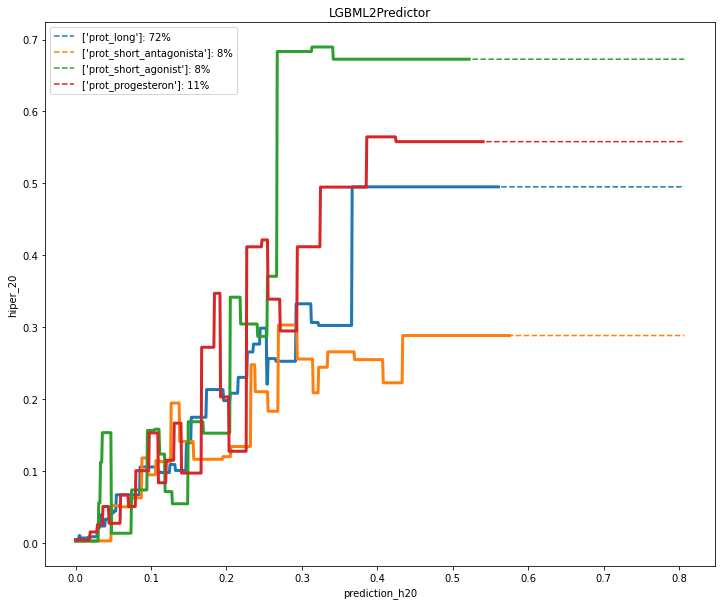

Fitting LGBMPredictor: 6245: 0:00:00.028571
Fitting LGBMPredictor: 673: 0:00:00.019727
Fitting LGBMPredictor: 684: 0:00:00.080271
Fitting LGBMPredictor: 950: 0:00:00.025203


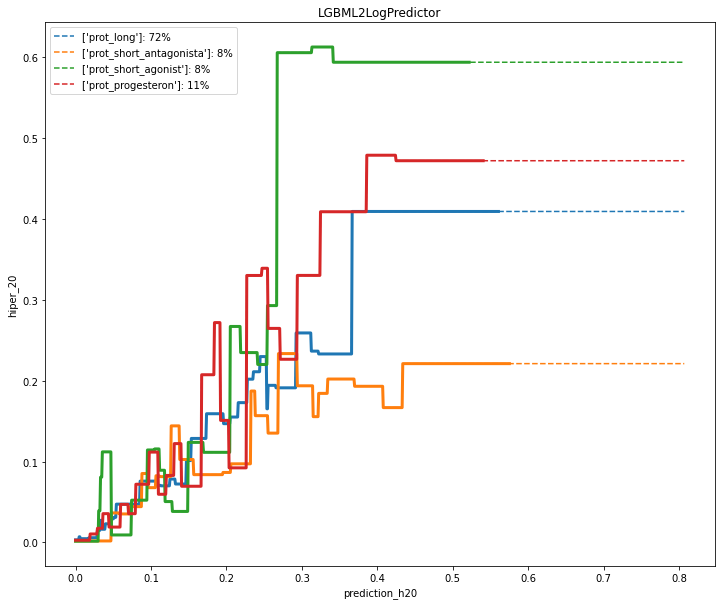

Fitting LGBMPredictor: 6245: 0:00:00.031621
Fitting LGBMPredictor: 673: 0:00:00.023243
Fitting LGBMPredictor: 684: 0:00:00.022690
Fitting LGBMPredictor: 950: 0:00:00.126362


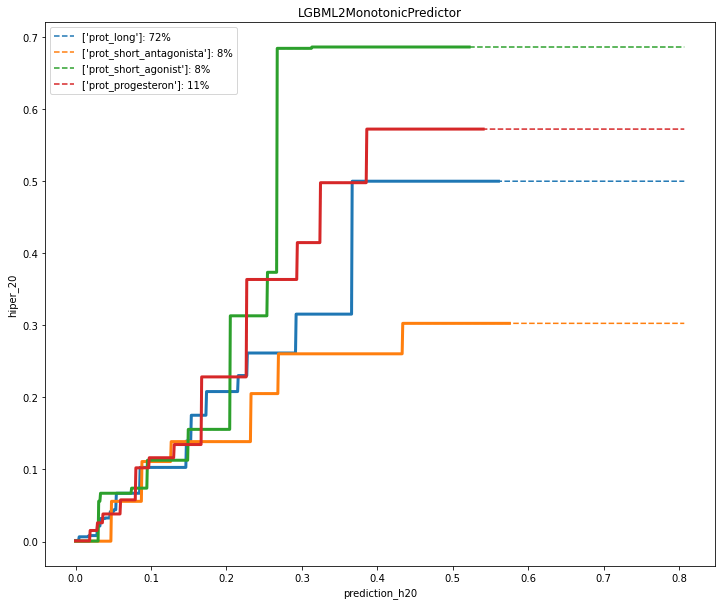

Fitting LGBMPredictor: 6245: 0:00:00.244271
Fitting LGBMPredictor: 673: 0:00:00.029667
Fitting LGBMPredictor: 684: 0:00:00.028547
Fitting LGBMPredictor: 950: 0:00:00.367078


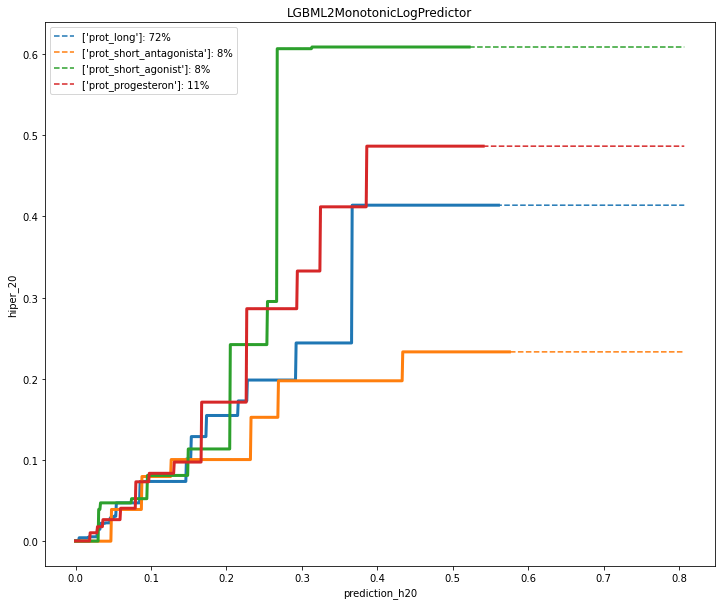

Fitting LGBMPredictor: 6245: 0:00:00.279966
Fitting LGBMPredictor: 673: 0:00:00.024674
Fitting LGBMPredictor: 684: 0:00:00.024404
Fitting LGBMPredictor: 950: 0:00:00.271357


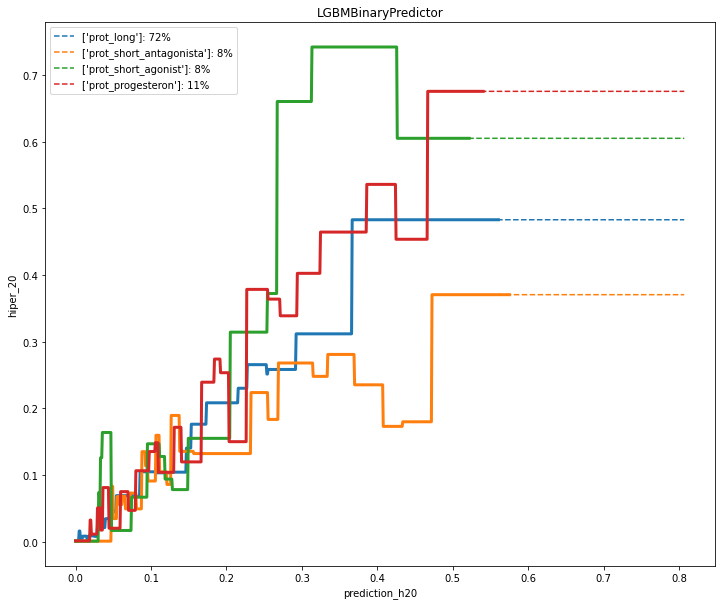

Fitting LGBMPredictor: 6245: 0:00:00.241549
Fitting LGBMPredictor: 673: 0:00:00.024113
Fitting LGBMPredictor: 684: 0:00:00.024086
Fitting LGBMPredictor: 950: 0:00:00.267406


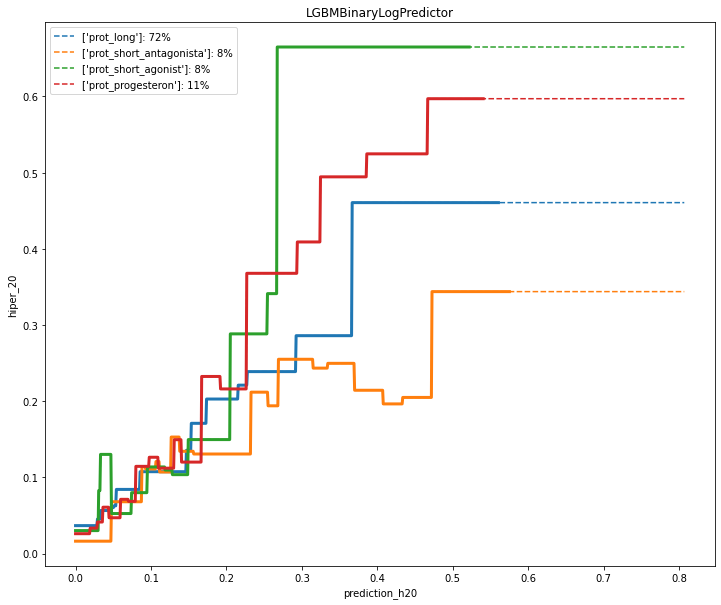

Fitting LGBMPredictor: 6245: 0:00:00.300793
Fitting LGBMPredictor: 673: 0:00:00.024255
Fitting LGBMPredictor: 684: 0:00:00.024008
Fitting LGBMPredictor: 950: 0:00:00.246780


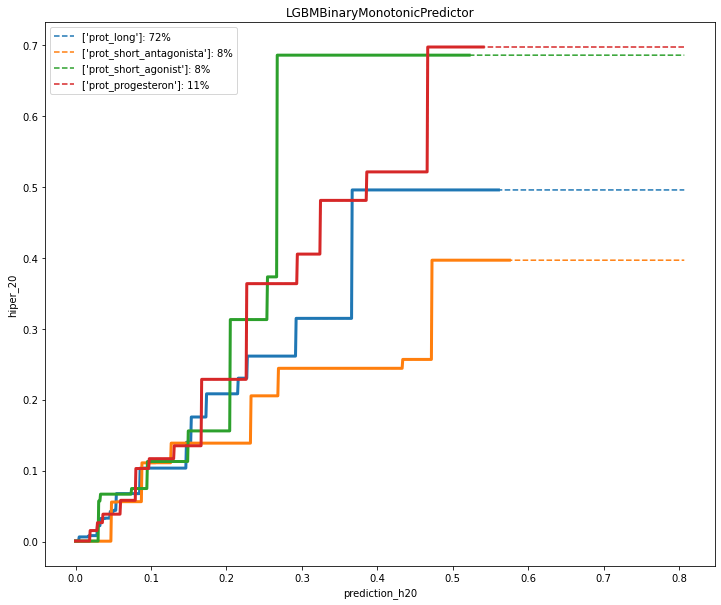

Fitting LGBMPredictor: 6245: 0:00:00.268843
Fitting LGBMPredictor: 673: 0:00:00.028360
Fitting LGBMPredictor: 684: 0:00:00.024604
Fitting LGBMPredictor: 950: 0:00:00.309369


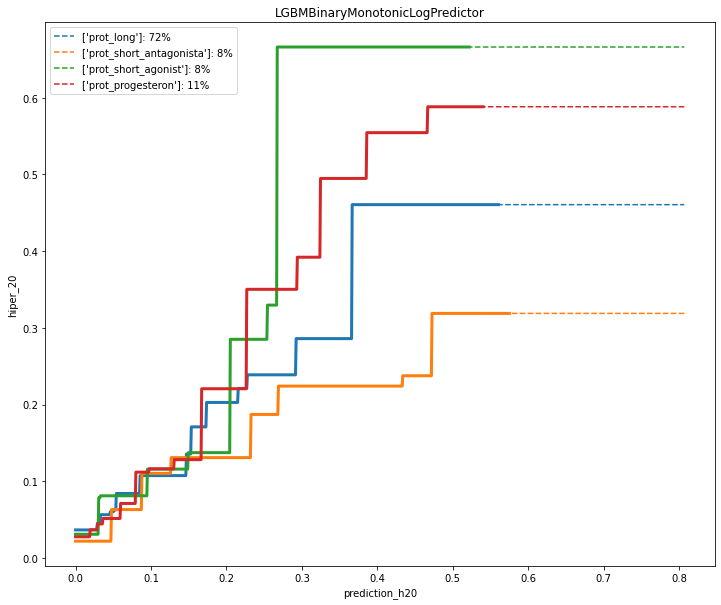

CPU times: user 11h 45min 28s, sys: 4h 9min 10s, total: 15h 54min 38s
Wall time: 1h 37min 6s


In [14]:
%%time

for therapy_predictor_class_name in THERAPY_PREDICTOR_CLASS_NAMES:
    
    plot_protocols(
        X_COL,
        Y_COL,
        THERAPY_PREDICTOR_FACTORY,
        therapy_predictor_class_name,
        MERGED_TEST_DF,
        PROT_SET,
        PLOT_DOTS,
        KDE_THRESHOLD,
    )

In [15]:
%%time

calculate_rmse_for_protocols(
    X_COL,
    Y_COL,
    THERAPY_PREDICTOR_FACTORY,
    THERAPY_PREDICTOR_CLASS_NAMES,
    MERGED_TEST_DF,
    PROT_SET,
    n_folds=5,
    error_metric='LIKELIHOOD',
)


Fitting KernelRidgePredictor: 4990: 0:02:09.824856
Fitting KernelRidgePredictor: 516: 0:00:02.764171
Fitting KernelRidgePredictor: 547: 0:00:02.756277
Fitting KernelRidgePredictor: 786: 0:00:05.591529
Fitting KernelRidgePredictor: 5012: 0:02:22.328510
Fitting KernelRidgePredictor: 534: 0:00:03.187149
Fitting KernelRidgePredictor: 549: 0:00:03.190035
Fitting KernelRidgePredictor: 752: 0:00:04.685757
Fitting KernelRidgePredictor: 4995: 0:02:29.265296
Fitting KernelRidgePredictor: 543: 0:00:03.177341
Fitting KernelRidgePredictor: 555: 0:00:03.262335
Fitting KernelRidgePredictor: 744: 0:00:05.248814
Fitting KernelRidgePredictor: 4977: 0:01:58.175781
Fitting KernelRidgePredictor: 553: 0:00:03.112434
Fitting KernelRidgePredictor: 555: 0:00:03.107397
Fitting KernelRidgePredictor: 758: 0:00:05.444792
Fitting KernelRidgePredictor: 5006: 0:02:02.160554
Fitting KernelRidgePredictor: 546: 0:00:03.275874
Fitting KernelRidgePredictor: 530: 0:00:03.089163
Fitting KernelRidgePredictor: 760: 0:00:05.48

Fitting LGBMPredictor: 752: 0:00:00.027138
Fitting LGBMPredictor: 4995: 0:00:00.040111
Fitting LGBMPredictor: 543: 0:00:00.027108
Fitting LGBMPredictor: 555: 0:00:00.027275
Fitting LGBMPredictor: 744: 0:00:00.028111
Fitting LGBMPredictor: 4977: 0:00:00.040287
Fitting LGBMPredictor: 553: 0:00:00.024740
Fitting LGBMPredictor: 555: 0:00:00.025007
Fitting LGBMPredictor: 758: 0:00:00.025715
Fitting LGBMPredictor: 5006: 0:00:00.039948
Fitting LGBMPredictor: 546: 0:00:00.025331
Fitting LGBMPredictor: 530: 0:00:00.025467
Fitting LGBMPredictor: 760: 0:00:00.026117
Fitting LGBMPredictor: 4990: 0:00:00.042037
Fitting LGBMPredictor: 516: 0:00:00.026611
Fitting LGBMPredictor: 547: 0:00:00.026124
Fitting LGBMPredictor: 786: 0:00:00.028139
Fitting LGBMPredictor: 5012: 0:00:00.042558
Fitting LGBMPredictor: 534: 0:00:00.026951
Fitting LGBMPredictor: 549: 0:00:00.026458
Fitting LGBMPredictor: 752: 0:00:00.027543
Fitting LGBMPredictor: 4995: 0:00:00.042880
Fitting LGBMPredictor: 543: 0:00:00.027169
Fitti

,['prot_long'],['prot_short_antagonista'],['prot_short_agonist'],['prot_progesteron'],all_protocols
KernelRidgePredictor : fold_0,0.75,0.84,0.74,0.81,0.76
KernelRidgePredictor : fold_1,0.77,0.84,0.80,0.81,0.78
KernelRidgePredictor : fold_2,0.76,0.75,0.90,0.81,0.78
KernelRidgePredictor : fold_3,0.76,0.81,0.80,0.78,0.77
KernelRidgePredictor : fold_4,0.78,0.80,0.79,0.80,0.78
KernelRidgeLogPredictor : fold_0,0.75,0.84,0.73,0.81,0.76
KernelRidgeLogPredictor : fold_1,0.77,0.85,0.80,0.81,0.78
KernelRidgeLogPredictor : fold_2,0.76,0.74,0.92,0.80,0.77
KernelRidgeLogPredictor : fold_3,0.76,0.81,0.80,0.78,0.77
KernelRidgeLogPredictor : fold_4,0.77,0.79,0.77,0.80,0.78


,['prot_long'],['prot_short_antagonista'],['prot_short_agonist'],['prot_progesteron'],all_protocols
KernelRidgePredictor : all_folds,0.76,0.81,0.80,0.80,0.77
KernelRidgeLogPredictor : all_folds,0.76,0.81,0.80,0.80,0.77
GausianProcessRegressorPredictor : all_folds,0.76,0.81,0.74,0.77,0.77
GausianProcessRegressorLogPredictor : all_folds,0.76,0.81,0.77,0.80,0.77
LGBML2Predictor : all_folds,0.76,0.80,0.81,0.79,0.77
LGBML2LogPredictor : all_folds,0.76,0.79,0.81,0.78,0.77
LGBML2MonotonicPredictor : all_folds,0.76,0.80,0.82,0.79,0.77
LGBML2MonotonicLogPredictor : all_folds,0.76,0.80,0.82,0.79,0.77
LGBMBinaryPredictor : all_folds,0.76,0.79,0.81,0.78,0.77
LGBMBinaryLogPredictor : all_folds,0.76,0.79,0.81,0.78,0.77


CPU times: user 1d 11h 46min 45s, sys: 15h 13min 41s, total: 2d 3h 26s
Wall time: 4h 39min 51s


# DATA_2015 - HIPER 25

In [16]:
MERGED_TEST_DF = merged_test_df_2015
PLOT_DOTS = False
X_COL = 'prediction_h25'
Y_COL = 'hiper_25'
PROT_SET = PROT_SETS.PROT_TYPE
KDE_THRESHOLD = 0.025


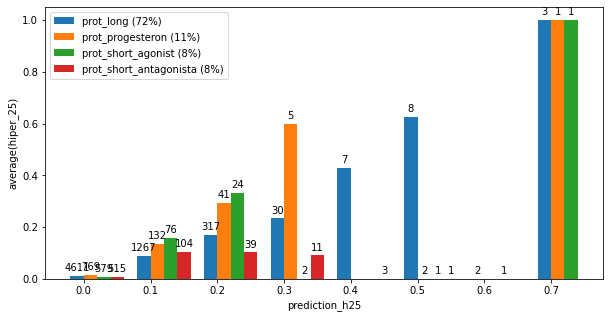

In [23]:
plot_results_with_segments_and_groups(
    MERGED_TEST_DF,
    target_col='hiper_25',
    segmentation_col='prot_type', top_segments=4, segments=None,
    groupby_col='prediction_h25', groupby_round=1, groupby_min=0, groupby_max=1,
    groupby_dict=None,
    title='')

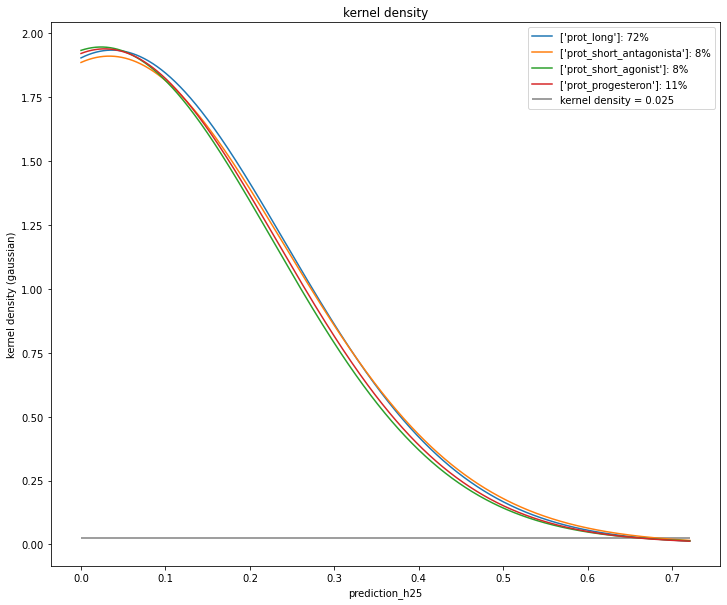

CPU times: user 655 ms, sys: 270 ms, total: 925 ms
Wall time: 922 ms


In [17]:
%%time

plot_kde_density_for_protocols(
    X_COL,
    MERGED_TEST_DF,
    PROT_SET,
    KDE_THRESHOLD,
)

Fitting KernelRidgePredictor: 6245: 0:02:27.289292
Fitting KernelRidgePredictor: 673: 0:00:04.639050
Fitting KernelRidgePredictor: 684: 0:00:03.783909
Fitting KernelRidgePredictor: 950: 0:00:06.322478


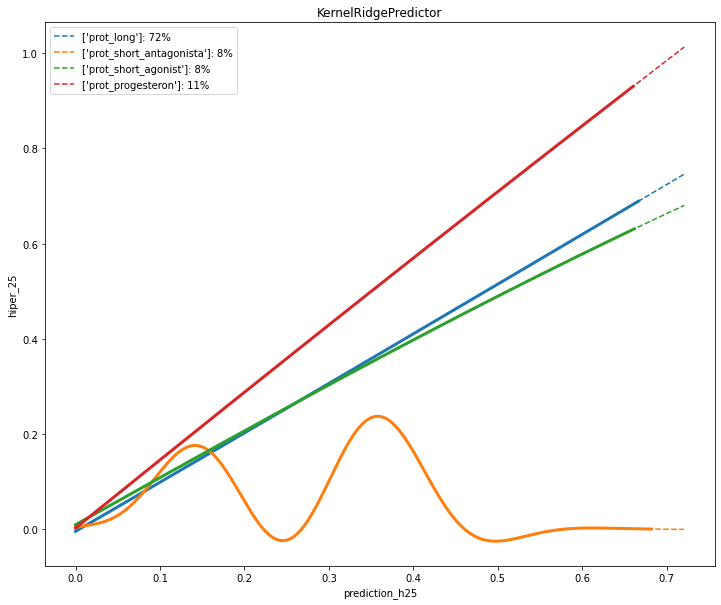

Fitting KernelRidgePredictor: 6245: 0:02:27.309424
Fitting KernelRidgePredictor: 673: 0:00:03.579153
Fitting KernelRidgePredictor: 684: 0:00:03.773596
Fitting KernelRidgePredictor: 950: 0:00:06.889623


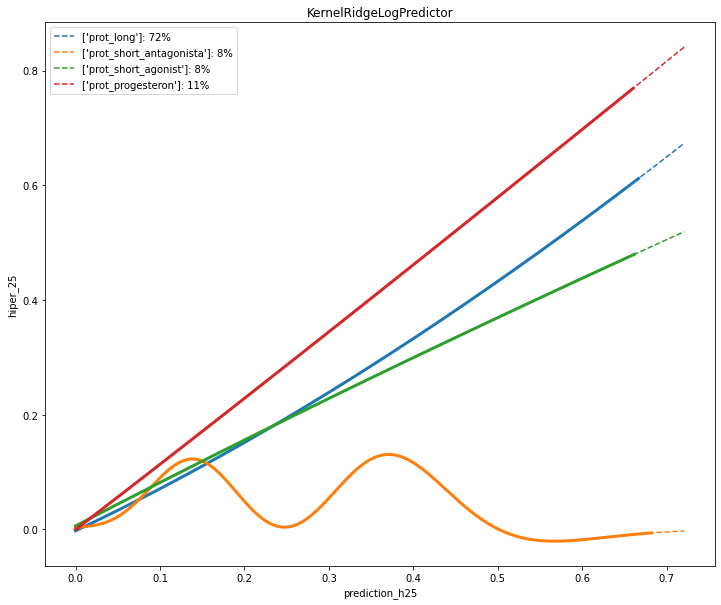

Fitting GausianProcessRegressorPredictor: 6245: 0:32:01.640342
Fitting GausianProcessRegressorPredictor: 673: 0:00:22.002912
Fitting GausianProcessRegressorPredictor: 684: 0:00:18.560491
Fitting GausianProcessRegressorPredictor: 950: 0:00:41.429656


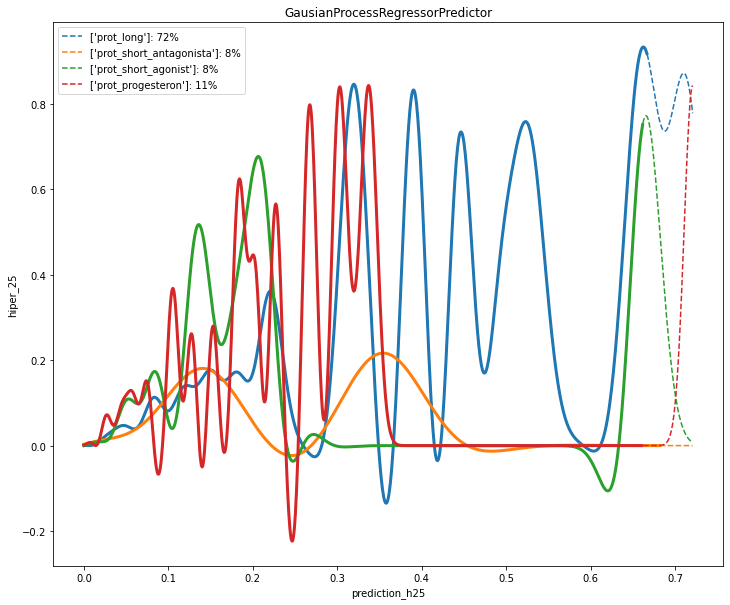

Fitting GausianProcessRegressorPredictor: 6245: 0:34:19.438617
Fitting GausianProcessRegressorPredictor: 673: 0:00:24.764170
Fitting GausianProcessRegressorPredictor: 684: 0:00:22.643633
Fitting GausianProcessRegressorPredictor: 950: 0:00:36.472288


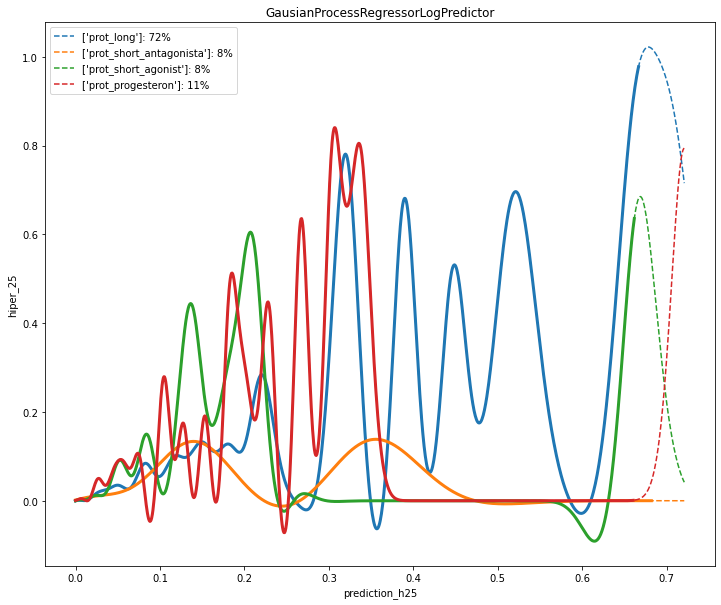

Fitting LGBMPredictor: 6245: 0:00:00.034488
Fitting LGBMPredictor: 673: 0:00:00.024842
Fitting LGBMPredictor: 684: 0:00:00.024337
Fitting LGBMPredictor: 950: 0:00:00.024734


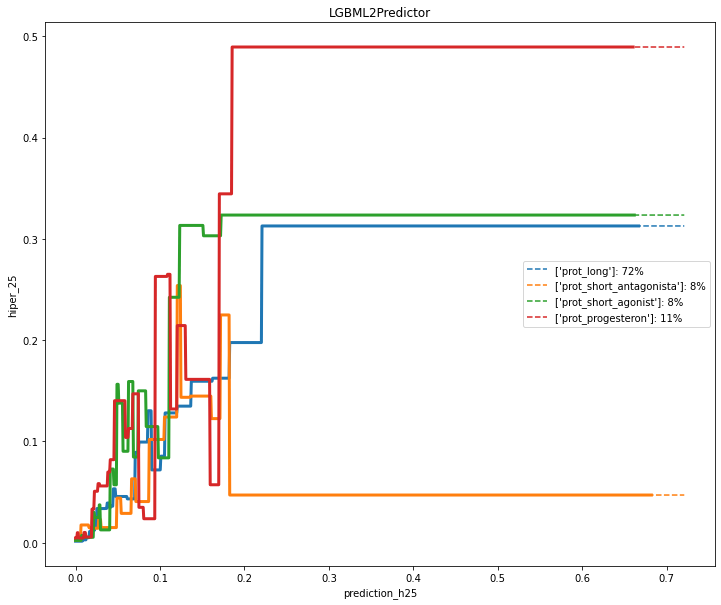

Fitting LGBMPredictor: 6245: 0:00:00.035529
Fitting LGBMPredictor: 673: 0:00:00.026367
Fitting LGBMPredictor: 684: 0:00:00.024840
Fitting LGBMPredictor: 950: 0:00:00.025701


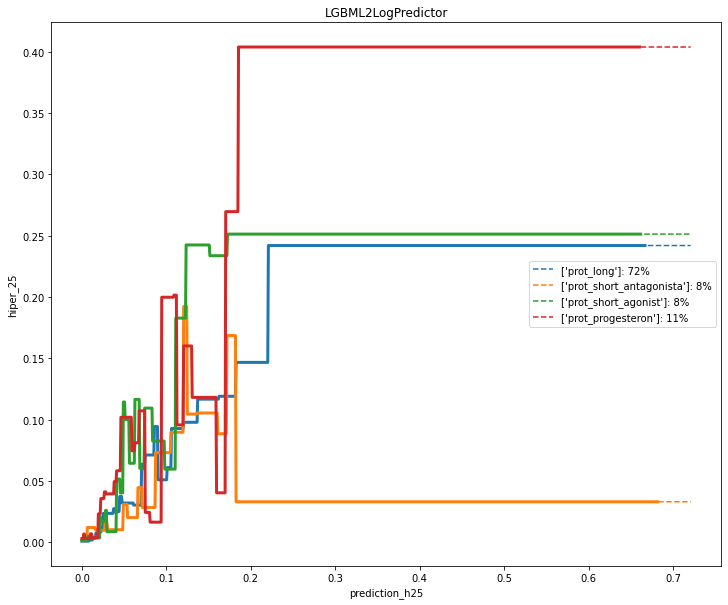

Fitting LGBMPredictor: 6245: 0:00:00.040092
Fitting LGBMPredictor: 673: 0:00:00.028760
Fitting LGBMPredictor: 684: 0:00:00.028187
Fitting LGBMPredictor: 950: 0:00:00.029239


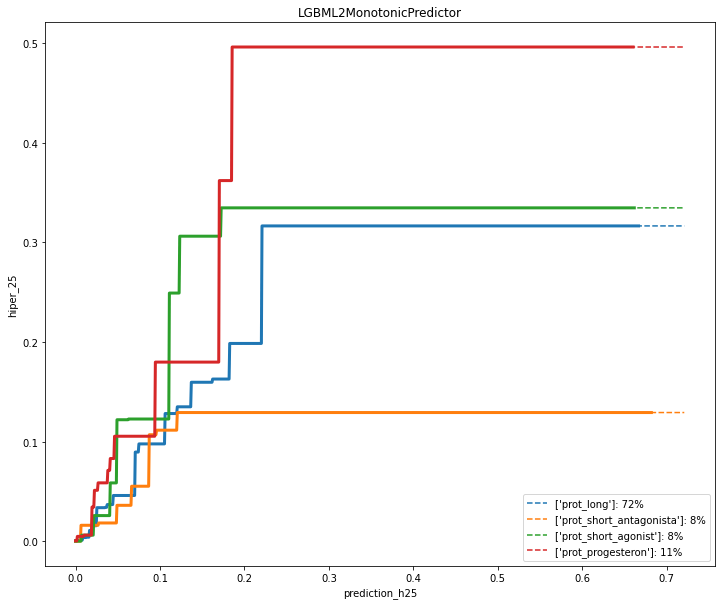

Fitting LGBMPredictor: 6245: 0:00:00.041666
Fitting LGBMPredictor: 673: 0:00:00.030134
Fitting LGBMPredictor: 684: 0:00:00.029510
Fitting LGBMPredictor: 950: 0:00:00.031027


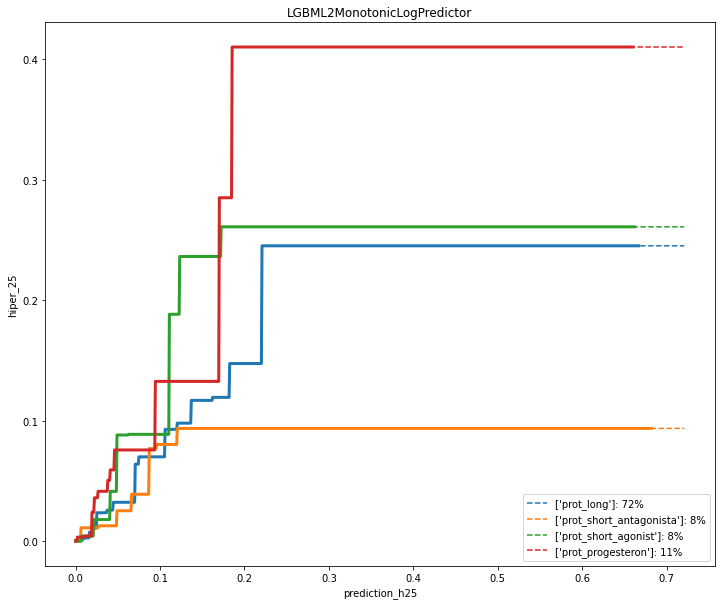

Fitting LGBMPredictor: 6245: 0:00:00.045265
Fitting LGBMPredictor: 673: 0:00:00.026561
Fitting LGBMPredictor: 684: 0:00:00.026919
Fitting LGBMPredictor: 950: 0:00:00.027151


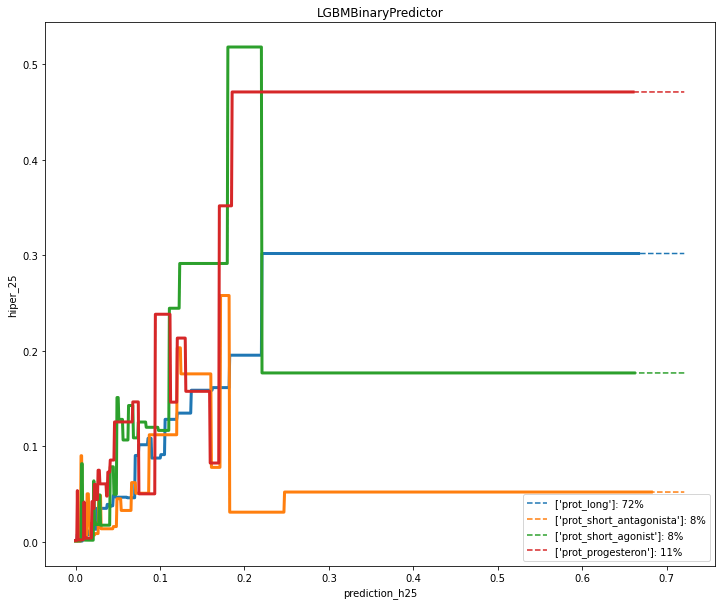

Fitting LGBMPredictor: 6245: 0:00:00.046238
Fitting LGBMPredictor: 673: 0:00:00.027847
Fitting LGBMPredictor: 684: 0:00:00.027742
Fitting LGBMPredictor: 950: 0:00:00.027599


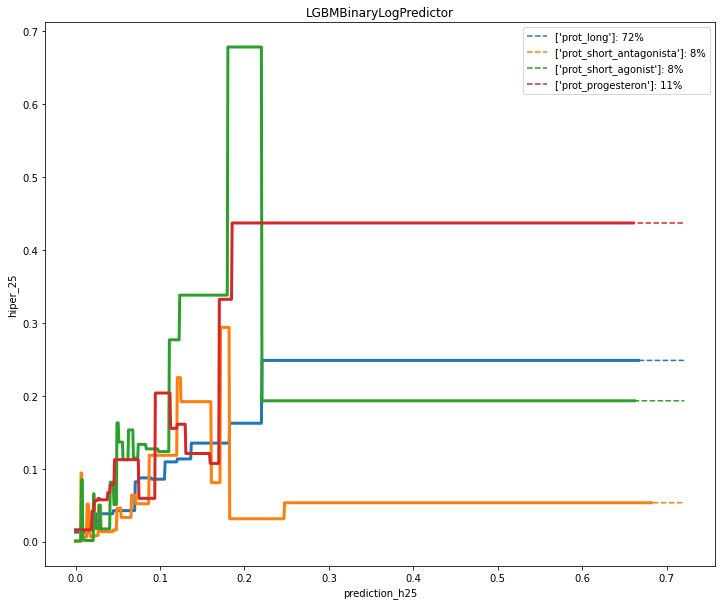

Fitting LGBMPredictor: 6245: 0:00:00.050533
Fitting LGBMPredictor: 673: 0:00:00.032011
Fitting LGBMPredictor: 684: 0:00:00.029643
Fitting LGBMPredictor: 950: 0:00:00.031305


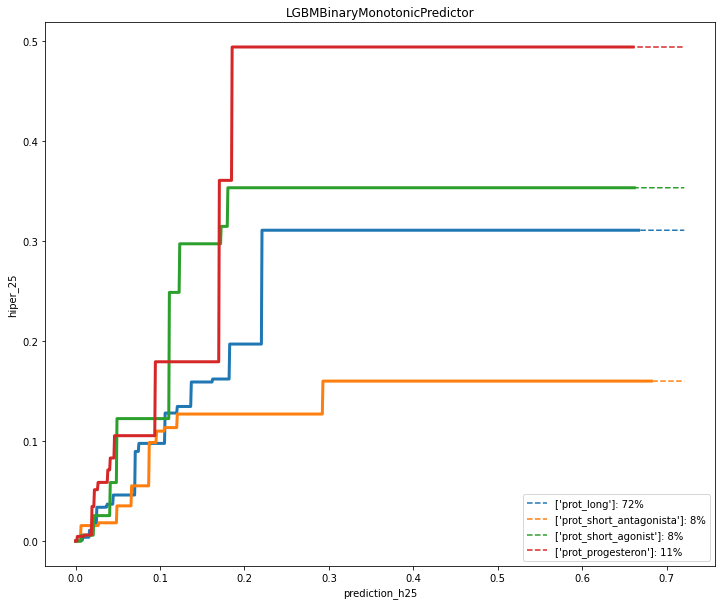

Fitting LGBMPredictor: 6245: 0:00:00.051375
Fitting LGBMPredictor: 673: 0:00:00.030333
Fitting LGBMPredictor: 684: 0:00:00.030085
Fitting LGBMPredictor: 950: 0:00:00.031812


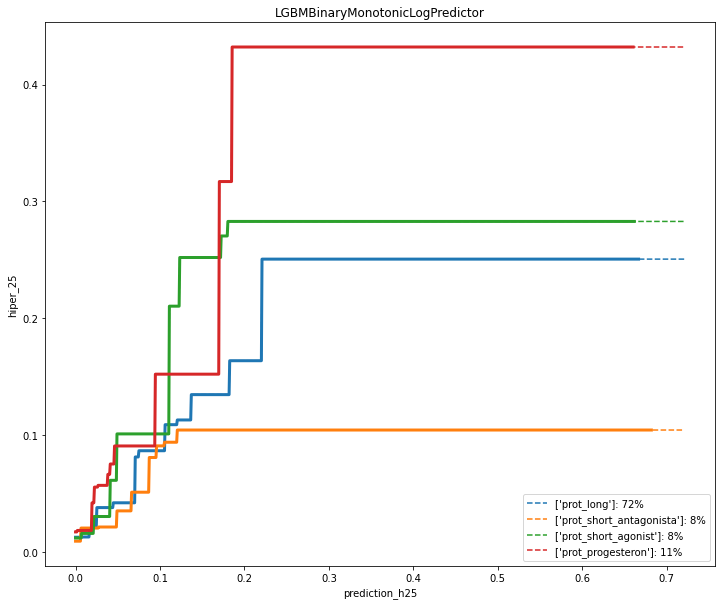

CPU times: user 11h 58min 18s, sys: 3h 38min 59s, total: 15h 37min 17s
Wall time: 1h 14min 45s


In [18]:
%%time

for therapy_predictor_class_name in THERAPY_PREDICTOR_CLASS_NAMES:
    
    plot_protocols(
        X_COL,
        Y_COL,
        THERAPY_PREDICTOR_FACTORY,
        therapy_predictor_class_name,
        MERGED_TEST_DF,
        PROT_SET,
        PLOT_DOTS,
        KDE_THRESHOLD,
    )

In [19]:
%%time

calculate_rmse_for_protocols(
    X_COL,
    Y_COL,
    THERAPY_PREDICTOR_FACTORY,
    THERAPY_PREDICTOR_CLASS_NAMES,
    MERGED_TEST_DF,
    PROT_SET,
    n_folds=5,
    error_metric='LIKELIHOOD',
)

Fitting KernelRidgePredictor: 4990: 0:01:36.730504
Fitting KernelRidgePredictor: 516: 0:00:02.474575
Fitting KernelRidgePredictor: 547: 0:00:02.642492
Fitting KernelRidgePredictor: 786: 0:00:04.609289
Fitting KernelRidgePredictor: 5012: 0:01:37.369963
Fitting KernelRidgePredictor: 534: 0:00:02.538347
Fitting KernelRidgePredictor: 549: 0:00:02.776974
Fitting KernelRidgePredictor: 752: 0:00:04.331633
Fitting KernelRidgePredictor: 4995: 0:01:38.797797
Fitting KernelRidgePredictor: 543: 0:00:02.650283
Fitting KernelRidgePredictor: 555: 0:00:02.671978
Fitting KernelRidgePredictor: 744: 0:00:04.205384
Fitting KernelRidgePredictor: 4977: 0:01:36.332359
Fitting KernelRidgePredictor: 553: 0:00:02.728259
Fitting KernelRidgePredictor: 555: 0:00:02.665861
Fitting KernelRidgePredictor: 758: 0:00:04.440977
Fitting KernelRidgePredictor: 5006: 0:01:38.088322
Fitting KernelRidgePredictor: 546: 0:00:02.653877
Fitting KernelRidgePredictor: 530: 0:00:02.542229
Fitting KernelRidgePredictor: 760: 0:00:04.37

Fitting LGBMPredictor: 4995: 0:00:00.041114
Fitting LGBMPredictor: 543: 0:00:00.025749
Fitting LGBMPredictor: 555: 0:00:00.025821
Fitting LGBMPredictor: 744: 0:00:00.027271
Fitting LGBMPredictor: 4977: 0:00:00.041214
Fitting LGBMPredictor: 553: 0:00:00.026149
Fitting LGBMPredictor: 555: 0:00:00.026279
Fitting LGBMPredictor: 758: 0:00:00.027198
Fitting LGBMPredictor: 5006: 0:00:00.040094
Fitting LGBMPredictor: 546: 0:00:00.025756
Fitting LGBMPredictor: 530: 0:00:00.026143
Fitting LGBMPredictor: 760: 0:00:00.026597
Fitting LGBMPredictor: 4990: 0:00:00.041933
Fitting LGBMPredictor: 516: 0:00:00.026771
Fitting LGBMPredictor: 547: 0:00:00.027153
Fitting LGBMPredictor: 786: 0:00:00.027902
Fitting LGBMPredictor: 5012: 0:00:00.041447
Fitting LGBMPredictor: 534: 0:00:00.028112
Fitting LGBMPredictor: 549: 0:00:00.027942
Fitting LGBMPredictor: 752: 0:00:00.028083
Fitting LGBMPredictor: 4995: 0:00:00.041797
Fitting LGBMPredictor: 543: 0:00:00.026766
Fitting LGBMPredictor: 555: 0:00:00.026603
Fitti

,['prot_long'],['prot_short_antagonista'],['prot_short_agonist'],['prot_progesteron'],all_protocols
KernelRidgePredictor : fold_0,0.88,0.90,0.82,0.90,0.88
KernelRidgePredictor : fold_1,0.88,0.94,0.90,0.89,0.89
KernelRidgePredictor : fold_2,0.89,0.86,0.96,0.85,0.89
KernelRidgePredictor : fold_3,0.87,0.85,0.87,0.82,0.86
KernelRidgePredictor : fold_4,0.88,0.89,0.86,0.83,0.87
KernelRidgeLogPredictor : fold_0,0.88,0.91,0.81,0.90,0.88
KernelRidgeLogPredictor : fold_1,0.88,0.95,0.90,0.91,0.89
KernelRidgeLogPredictor : fold_2,0.89,0.86,0.97,0.85,0.89
KernelRidgeLogPredictor : fold_3,0.87,0.85,0.86,0.82,0.86
KernelRidgeLogPredictor : fold_4,0.88,0.89,0.85,0.82,0.87


,['prot_long'],['prot_short_antagonista'],['prot_short_agonist'],['prot_progesteron'],all_protocols
KernelRidgePredictor : all_folds,0.88,0.89,0.88,0.86,0.88
KernelRidgeLogPredictor : all_folds,0.88,0.89,0.88,0.86,0.88
GausianProcessRegressorPredictor : all_folds,0.87,0.89,0.85,0.81,0.87
GausianProcessRegressorLogPredictor : all_folds,0.88,0.89,0.85,0.79,0.87
LGBML2Predictor : all_folds,0.88,0.88,0.89,0.85,0.88
LGBML2LogPredictor : all_folds,0.88,0.88,0.89,0.84,0.87
LGBML2MonotonicPredictor : all_folds,0.88,0.89,0.89,0.85,0.88
LGBML2MonotonicLogPredictor : all_folds,0.88,0.89,0.89,0.85,0.88
LGBMBinaryPredictor : all_folds,0.88,0.88,0.88,0.85,0.88
LGBMBinaryLogPredictor : all_folds,0.88,0.88,0.88,0.85,0.87


CPU times: user 1d 11h 29min 51s, sys: 14h 5min 12s, total: 2d 1h 35min 4s
Wall time: 3h 50min 35s
